<a href="https://colab.research.google.com/github/beatrizgo042/Introducao-a-data-science/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
print(sns.__version__)

0.12.2


# Analizando as notas em geral

In [2]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
notas.columns = ["usuarioId", "filmeId", "notas", "momento"]
notas.head()

,usuarioId,filmeId,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas["notas"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
notas["notas"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: notas, dtype: int64

In [7]:
print("Média:", notas["notas"].mean())
print("Mediana:", notas.notas.median())

Média: 3.501556983616962
Mediana: 3.5


<Axes: ylabel='Frequency'>

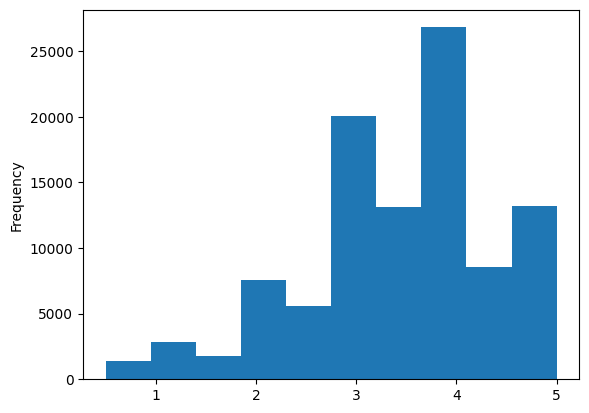

In [8]:
notas.notas.plot(kind="hist")

In [9]:
notas.notas.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: notas, dtype: float64

<Axes: >

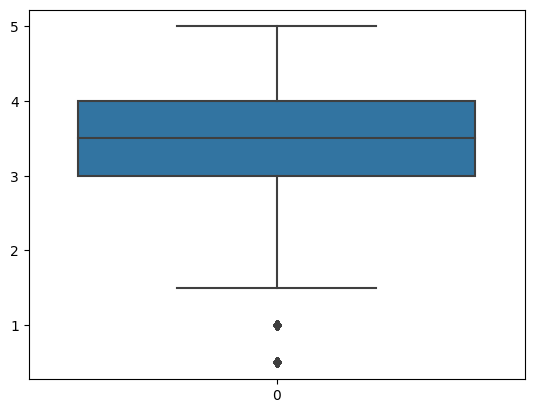

In [10]:
import seaborn as sns

sns.boxplot(notas.notas)

# Olhando os filmes

In [11]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
notas.head()

,usuarioId,filmeId,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analizando algumas notas específicas por filme

In [13]:
notas.query("filmeId == 1").notas.mean()

3.9209302325581397

In [14]:
medias_por_filme = notas.groupby("filmeId").notas.mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: notas, dtype: float64

<Axes: ylabel='Frequency'>

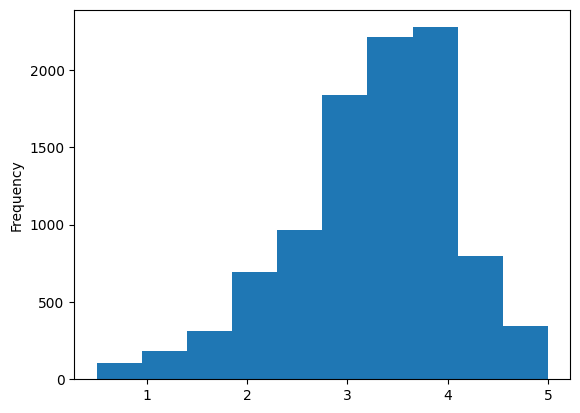

In [15]:
medias_por_filme.plot(kind="hist")

In [16]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: notas, dtype: float64

<ipython-input-17-c99e5fbcf4e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme)


<Axes: xlabel='notas', ylabel='Density'>

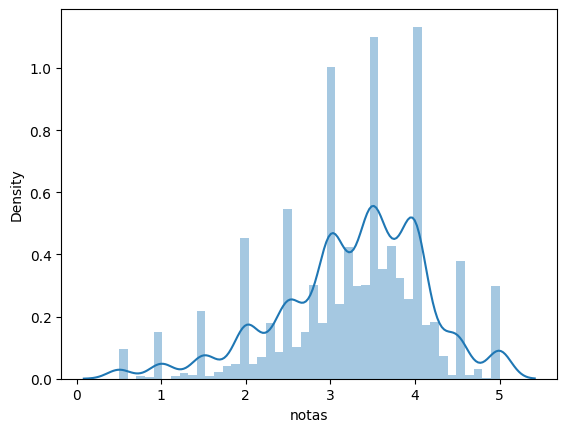

In [17]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

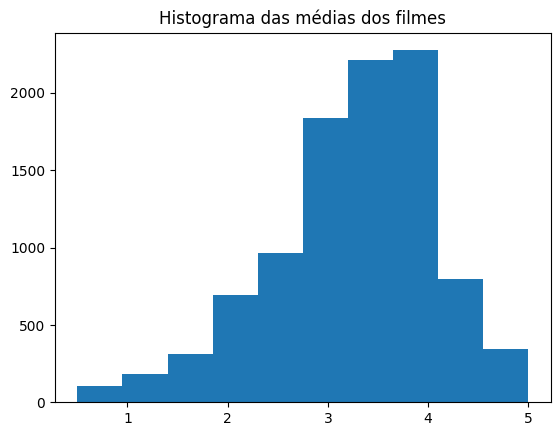

In [18]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [19]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0


In [20]:
tmdb.original_language.unique()  #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta'], dtype=object)

In [21]:
#primeiro grau    categorica ordinal
#segundo grau
#terceiro grau
#1 grau < 2 grau < 3 grau

In [22]:
#budjet => orçamento => quantitativo continuo

In [23]:
#quantidade de votos => 1, 2, 3, ... nao tem 2,5 votos
#notas do movielens => 0.5, 1.0, 1.5, 2.0, 2.5, ... nao tem 2.7

In [24]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,2367
1,fr,19
2,zh,13
3,ja,7
4,ru,6


<Axes: xlabel='original_language', ylabel='total'>

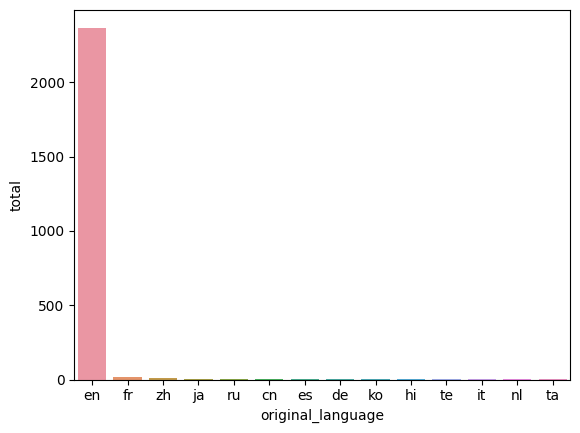

In [25]:
sns.barplot(x = "original_language", y = "total", data = contagem_de_lingua)

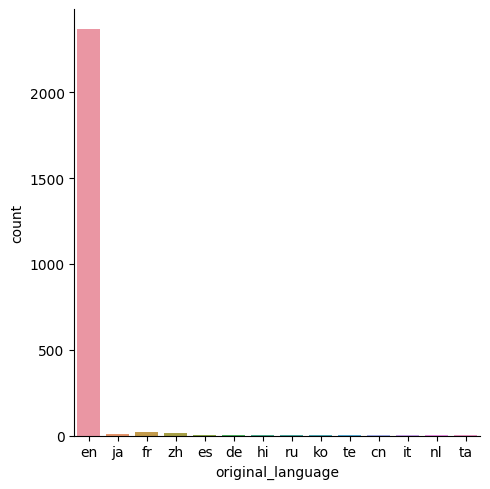

In [26]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7976e004f4f0>,
 [Text(-1.0957693797927701, 0.09638187749036796, 'en'),
  Text(1.0874913124609855, -0.16541658115764346, 'fr'),
  Text(1.093392038229083, -0.12039040965646587, 'zh'),
  Text(1.096134218690085, -0.09213997295786835, 'ja'),
  Text(1.0975253770399418, -0.0737431132603825, 'ru'),
  Text(1.098535501060826, -0.0567428665916731, 'cn'),
  Text(1.0992301410636445, -0.04114725965602744, 'es'),
  Text(1.0996695148438866, -0.02696216094846878, 'de'),
  Text(1.099868167809058, -0.01702978098348999, 'ko'),
  Text(1.0999258435670312, -0.012772574265001295, 'hi'),
  Text(1.0999551396137577, -0.009934326211621932, 'te'),
  Text(1.0999771118589305, -0.007096012012787063, 'it'),
  Text(1.099991760156253, -0.00425765056676735, 'nl'),
  Text(1.0999990844081922, -0.0014192607721480325, 'ta')])

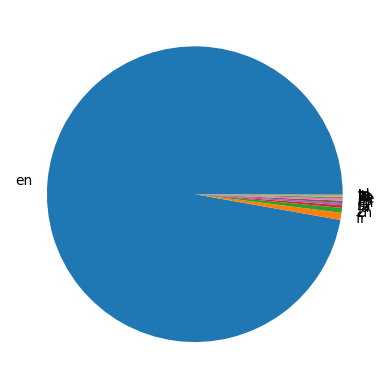

In [27]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [28]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

2367 68


<Axes: xlabel='lingua', ylabel='total'>

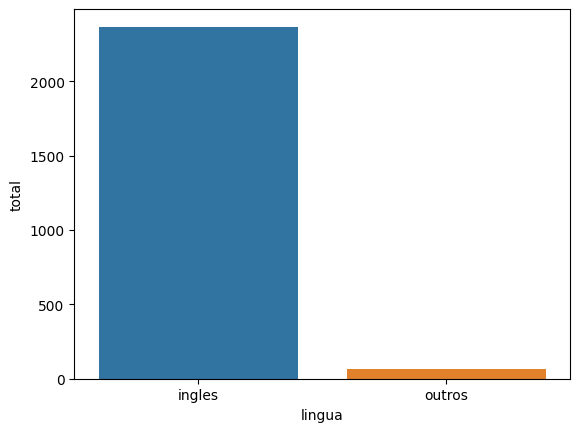

In [29]:
dados = {
    "lingua" : ["ingles", "outros"],
    "total" : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x = "lingua", y = "total", data = dados)

In [30]:
dados

,lingua,total
0,ingles,2367
1,outros,68


([<matplotlib.patches.Wedge at 0x7976dff99b70>,
 [Text(-1.0957693797927701, 0.09638187749036796, 'ingles'),
  Text(1.0957693769727939, -0.0963819095507842, 'outros')])

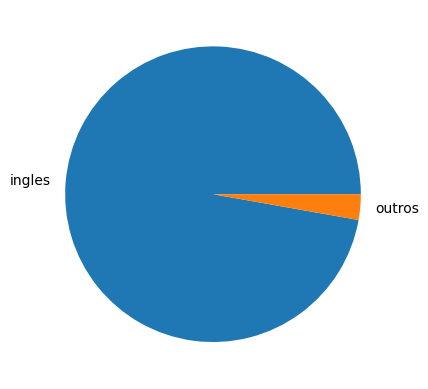

In [31]:
plt.pie(dados["total"], labels = dados["lingua"])

In [32]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    19
zh    13
ja     7
ru     6
cn     6
es     5
de     5
ko     2
hi     1
te     1
it     1
nl     1
ta     1
Name: original_language, dtype: int64

<Figure size 1000x500 with 0 Axes>

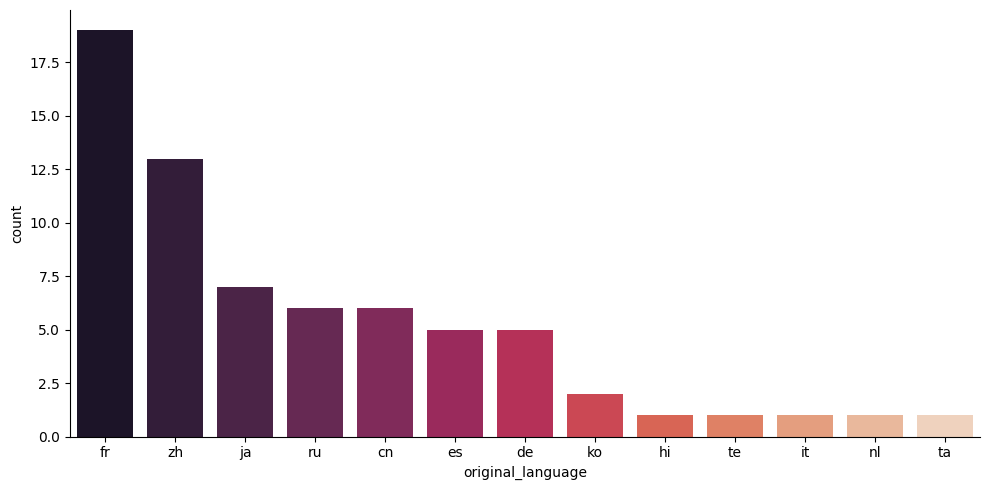

In [105]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

plt.figure(figsize=(10,5))
sns.catplot(x = "original_language",
            kind = "count",
            data = filmes_sem_lingua_original_em_ingles,
            aspect = 2,
            order = total_por_lingua_de_outros_filmes.index,
            palette = "rocket")

# Revisando o papel da media, mediana, medidas de tendencia central, dispersao, disvio padrao, box plot, histograma


In [36]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [40]:
notas_do_toy_story = notas.query("filmeId == 1")
notas_do_jumanji = notas.query("filmeId == 2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [44]:
print("Nota Media do Toy Story %.2f" % notas_do_toy_story["notas"].mean())
print("Nota Media do Jumanji %.2f" % notas_do_jumanji["notas"].mean())

Nota Media do Toy Story 3.92
Nota Media do Jumanji 3.43


In [45]:
print("Nota Media do Toy Story %.2f" % notas_do_toy_story["notas"].median())
print("Nota Media do Jumanji %.2f" % notas_do_jumanji["notas"].median())

Nota Media do Toy Story 4.00
Nota Media do Jumanji 3.50


In [50]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [92]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

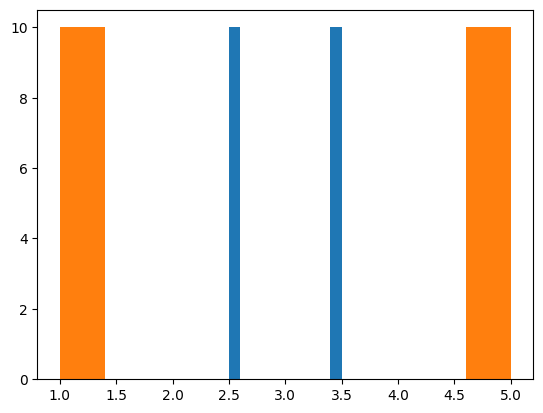

In [59]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7976d46b6830>,
 'caps': [<matplotlib.lines.Line2D at 0x7976d46b6c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7976d46b64a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7976d46b7280>,
 'fliers': [<matplotlib.lines.Line2D at 0x7976d46b7400>,
 'means': []}

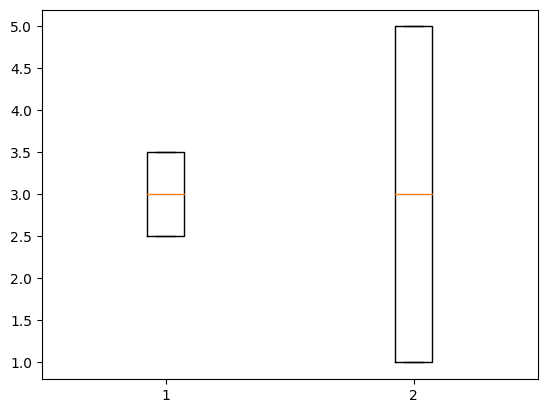

In [65]:
plt.boxplot([filme1, filme2])

<Axes: >

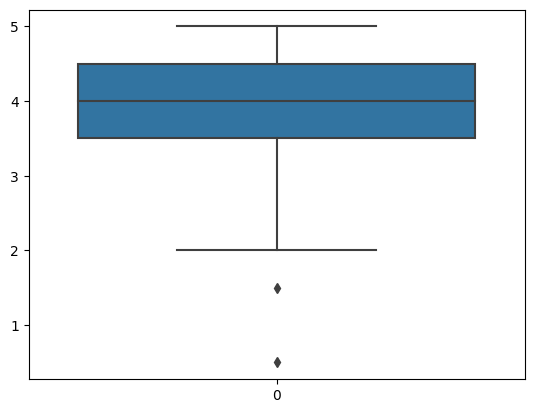

In [81]:
sns.boxplot(notas_do_toy_story["notas"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7976d45495a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7976d4549ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7976d4549300>,
 'medians': [<matplotlib.lines.Line2D at 0x7976d454a020>,
 'fliers': [<matplotlib.lines.Line2D at 0x7976d454a2c0>,
 'means': []}

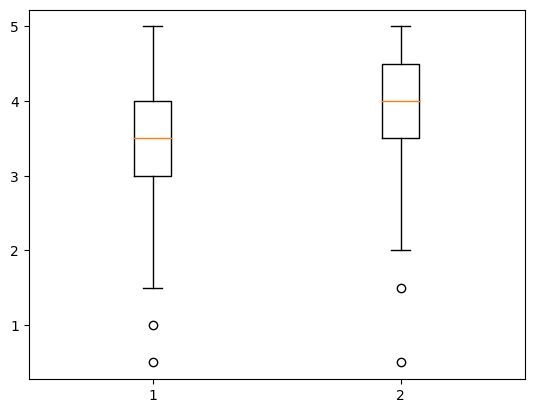

In [79]:
plt.boxplot([notas_do_jumanji.notas, notas_do_toy_story["notas"]])

<Axes: xlabel='filmeId', ylabel='notas'>

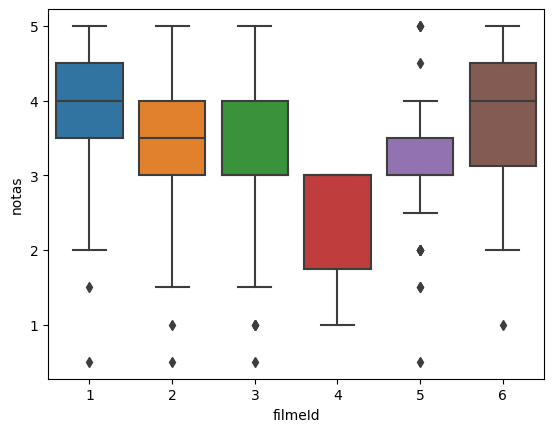

In [88]:
sns.boxplot(x = "filmeId", y = "notas", data = notas.query("filmeId in [1,2,3,4,5,6]"))

In [91]:
print(notas_do_toy_story["notas"].std(), notas_do_jumanji["notas"].std())


0.8348591407114047 0.8817134921476455
